## Import Modules

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"divyansh16","key":"a8ab14c8c7aa4ac5a7eb2d52c05dd0da"}'}

In [ ]:
! kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          11918        308  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1749         38  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36           1410         41  1.0              
iammustafatz/diabetes-prediction-dataset               

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip toronto-emotional-speech-set-tess.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: train/TESS Toronto emotional speech set data/OAF

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/train/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/train/TESS Toronto emotional speech set data/YAF_angry/YAF_yes_angry.wav',
 '/content/train/TESS Toronto emotional speech set data/YAF_angry/YAF_pass_angry.wav',
 '/content/train/TESS Toronto emotional speech set data/YAF_angry/YAF_loaf_angry.wav',
 '/content/train/TESS Toronto emotional speech set data/YAF_angry/YAF_sheep_angry.wav',
 '/content/train/TESS Toronto emotional speech set data/YAF_angry/YAF_match_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/train/TESS Toronto emotional speech s...,angry
1,/content/train/TESS Toronto emotional speech s...,angry
2,/content/train/TESS Toronto emotional speech s...,angry
3,/content/train/TESS Toronto emotional speech s...,angry
4,/content/train/TESS Toronto emotional speech s...,angry


In [ ]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
sad        400
ps         400
neutral    400
Name: label, dtype: int64

## Exploratory Data Analysis

In [1]:
sns.countplot(df['label'])

NameError: ignored

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

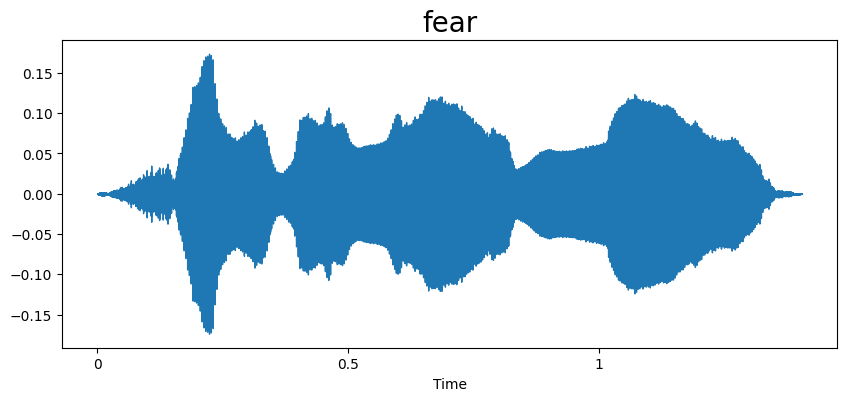

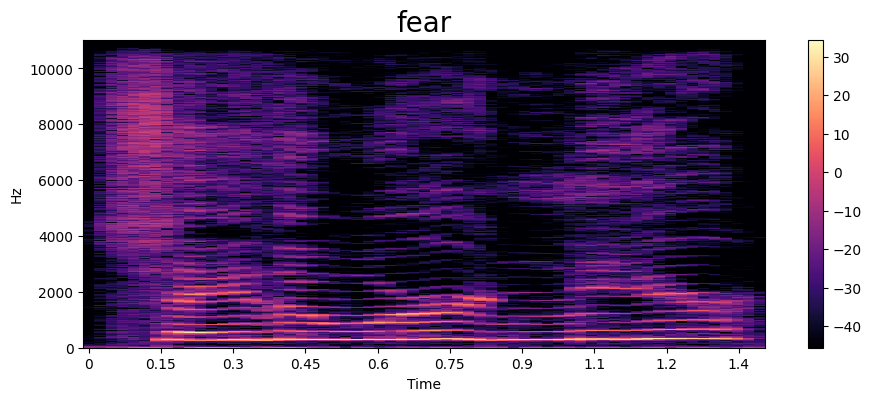

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

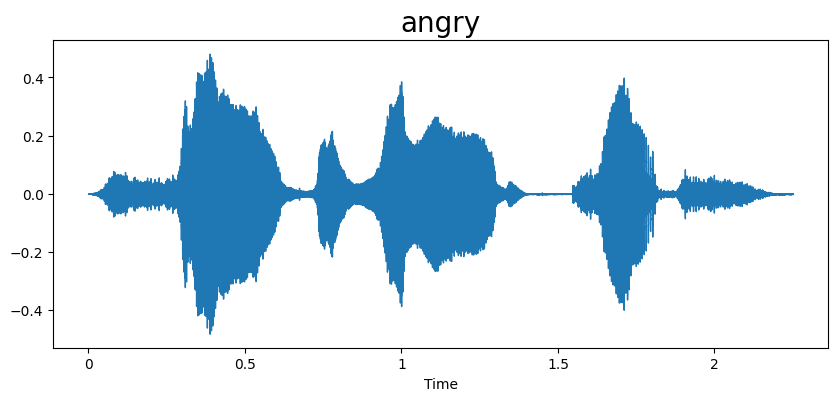

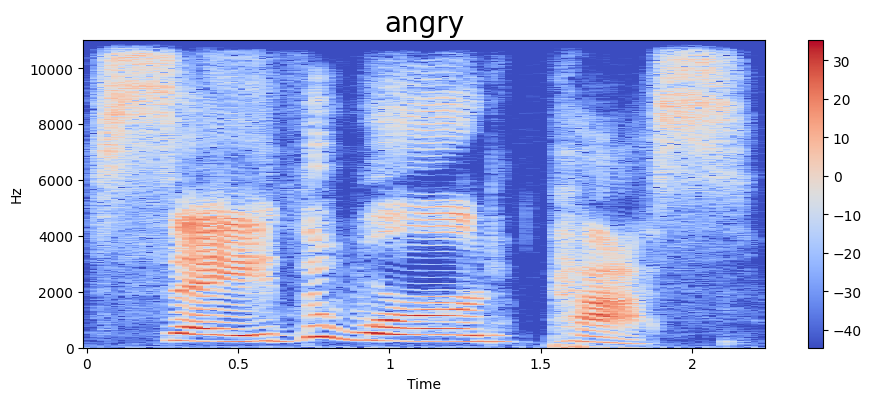

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

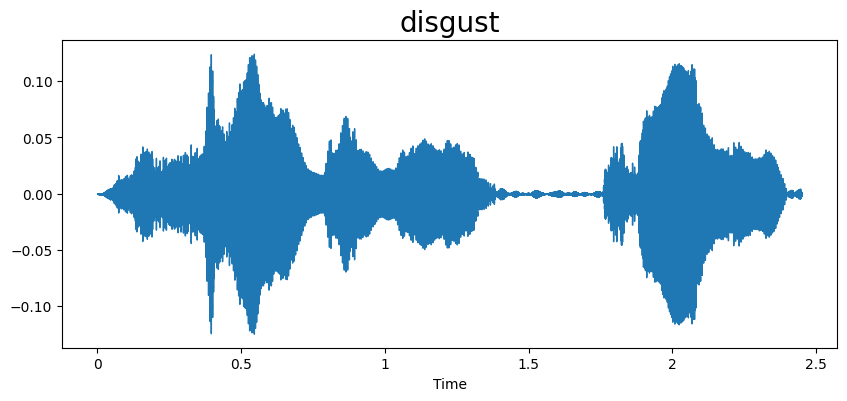

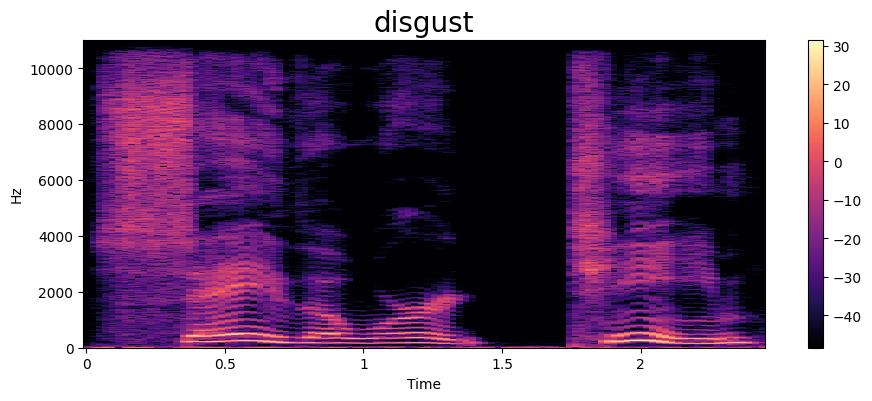

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

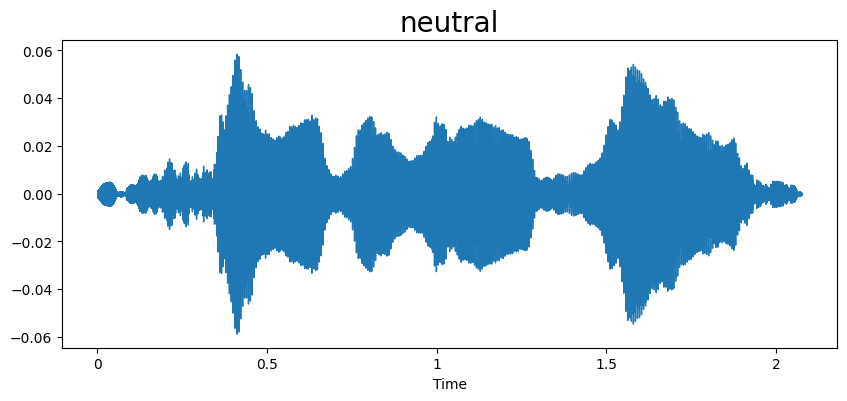

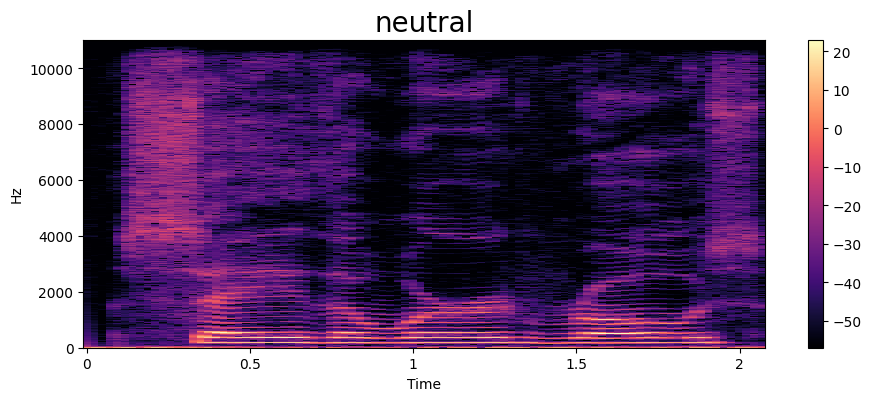

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

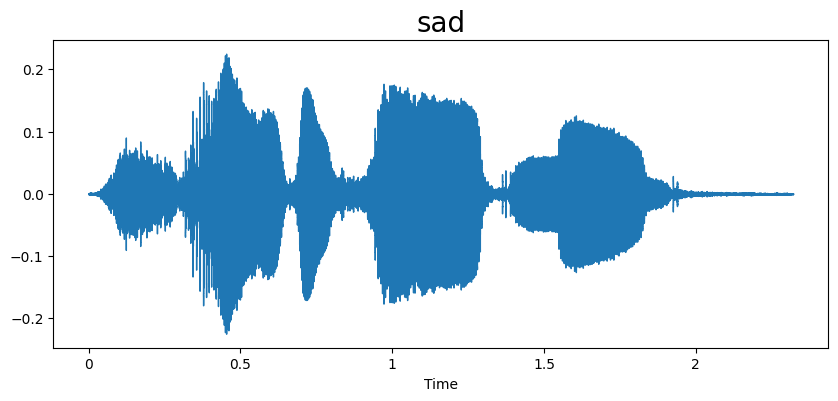

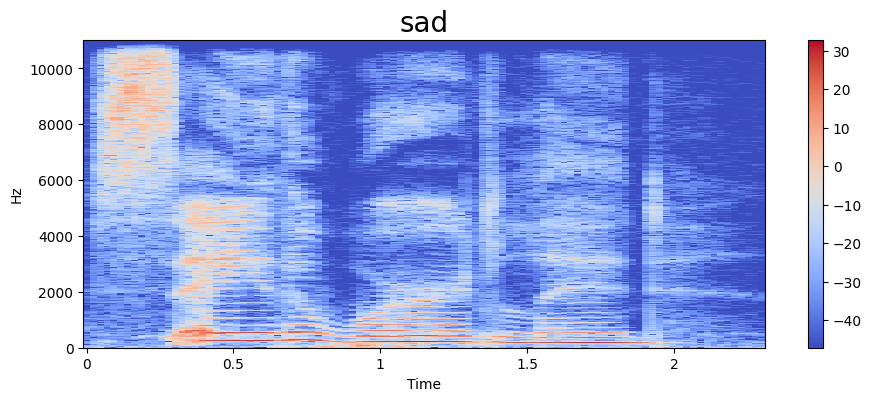

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

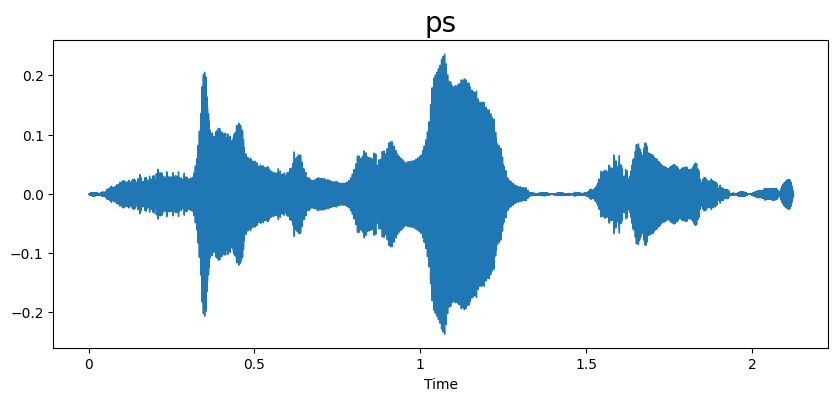

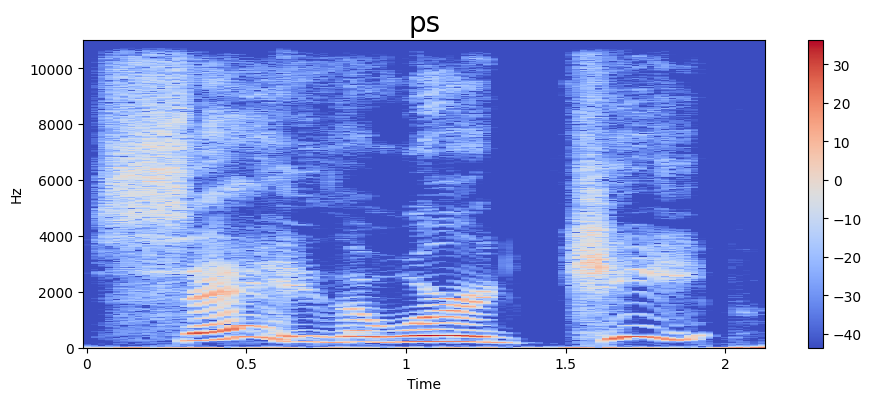

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

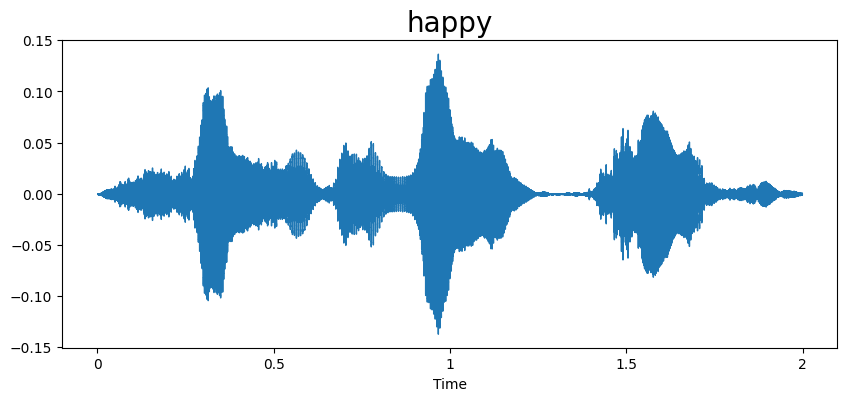

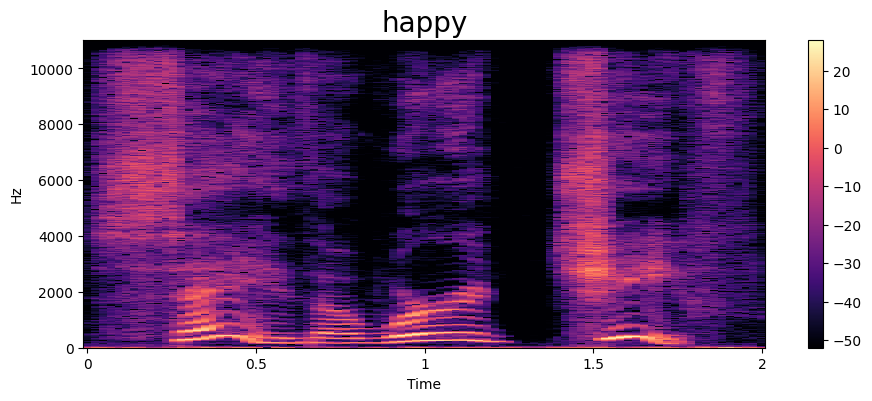

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-336.45566   ,   42.530975  ,   -2.9627378 ,    1.367751  ,
        -17.67515   ,   -0.6909898 ,   -2.0826385 ,  -21.715689  ,
         -0.3633304 ,   -4.3584933 ,  -14.33754   ,    7.0230885 ,
        -12.430077  ,    8.055791  ,   -7.3588476 ,   -3.895641  ,
         -2.8115873 ,   -2.3314743 ,   -7.9744105 ,    2.4882455 ,
         -2.1746063 ,   -2.328559  ,   -1.6760519 ,   -3.3235247 ,
         -5.2452517 ,    3.8852463 ,    4.4857244 ,   11.7534075 ,
         12.16479   ,   11.878097  ,    9.007148  ,    6.510357  ,
         -1.1912944 ,    0.3555761 ,   -0.6441033 ,    2.784449  ,
          0.78820825,    0.6293622 ,   -1.9828411 ,    1.8147798 ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-336.45566, 42.530975, -2.9627378, 1.367751, ...
1       [-334.94592, 37.075512, -7.904569, -1.8379067,...
2       [-338.45975, 54.701324, -5.067721, 2.7130187, ...
3       [-348.75854, 32.180397, -12.02067, 28.132154, ...
4       [-314.62842, 37.37217, -22.038025, 18.40705, -...
                              ...                        
2795    [-359.57416, 61.743153, -5.9961267, -6.880888,...
2796    [-355.44644, 98.06712, -15.971464, -11.443155,...
2797    [-375.82394, 38.249294, -0.39016965, -2.440791...
2798    [-313.10144, 86.69693, -25.172934, -28.02399, ...
2799    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=150, batch_size=64)

Epoch 1/150
35/35 [==============================] - 0s 10ms/step - loss: 1.5243e-05 - accuracy: 1.0000 - val_loss: 6.9052 - val_accuracy: 0.6500
Epoch 2/150
35/35 [==============================] - 0s 8ms/step - loss: 2.9309e-06 - accuracy: 1.0000 - val_loss: 6.9056 - val_accuracy: 0.6500
Epoch 3/150
35/35 [==============================] - 0s 9ms/step - loss: 1.5004e-05 - accuracy: 1.0000 - val_loss: 6.9375 - val_accuracy: 0.6500
Epoch 4/150
35/35 [==============================] - 0s 8ms/step - loss: 6.5229e-06 - accuracy: 1.0000 - val_loss: 6.9406 - val_accuracy: 0.6518
Epoch 5/150
35/35 [==============================] - 0s 8ms/step - loss: 3.3680e-06 - accuracy: 1.0000 - val_loss: 6.9380 - val_accuracy: 0.6518
Epoch 6/150
35/35 [==============================] - 0s 7ms/step - loss: 2.0446e-06 - accuracy: 1.0000 - val_loss: 6.9444 - val_accuracy: 0.6518
Epoch 7/150
35/35 [==============================] - 0s 9ms/step - loss: 3.8789e-06 - accuracy: 1.0000 - val_loss: 6.9575 - val_a

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

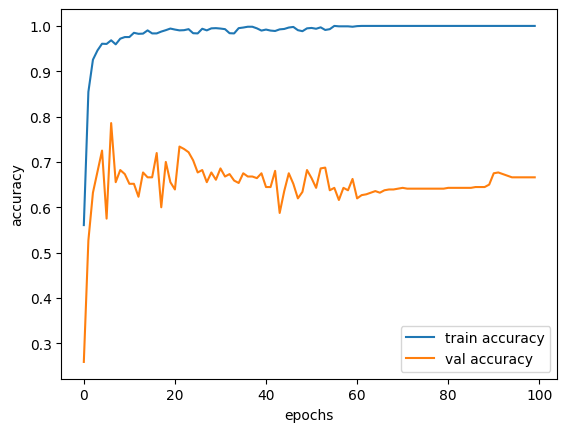

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

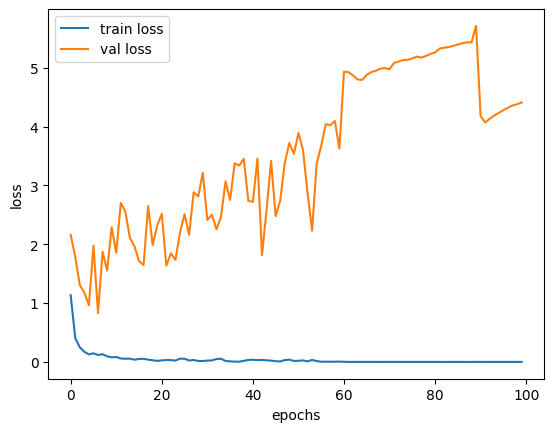

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()